## Euclidean and Manhattan Distance Calculations

In this short mini project you will see examples and comparisons of distance measures. Specifically, you'll visually compare the Euclidean distance to the Manhattan distance measures. The application of distance measures has a multitude of uses in data science and is the foundation of many algorithms you'll be using such as Prinical Components Analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# Load Course Numerical Dataset
df = pd.read_csv('data/distance_dataset.csv',index_col=0)
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


### Euclidean Distance

Let's visualize the difference between the Euclidean and Manhattan distance.

We are using Pandas to load our dataset .CSV file and use Numpy to compute the __Euclidean distance__ to the point (Y=5, Z=5) that we choose as reference. On the left here we show the dataset projected onto the YZ plane and color coded per the Euclidean distance we just computed. As we are used to, points that lie at the same Euclidean distance define a regular 2D circle of radius that distance.

Note that the __SciPy library__ comes with optimized functions written in C to compute distances (in the scipy.spatial.distance module) that are much faster than our (naive) implementation.

In [17]:
# In the Y-Z plane, we compute the distance to ref point (5,5)
distEuclid = np.sqrt((df.Z - 5)**2 + (df.Y - 5)**2)
distEuclid.head()

0    1.146017
1    1.335918
2    3.086419
3    0.771428
4    2.829148
dtype: float64

**<font color='teal'>Create a distance to reference point (3,3) matrix similar to the above example.</font>**

In [19]:
# Create a distance to reference point(3,3)
distEuclid_3 = np.sqrt((df.Z -3)**2 + (df.Y -3)**2)
distEuclid_3.head()

0    3.022262
1    4.151203
2    4.547162
3    3.456205
4    1.063003
dtype: float64

**<font color='teal'>Replace the value set to 'c' in the plotting cell below with your own distance matrix and review the result to deepen your understanding of Euclidean distances. </font>**

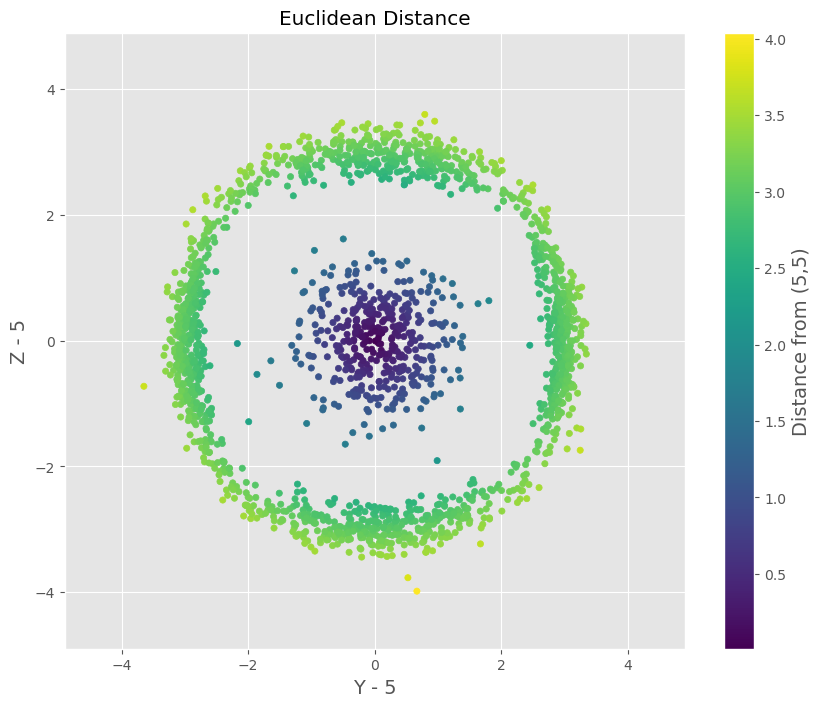

In [25]:
#distance matrix with ref point(5,5) distEuclid

figEuclid = plt.figure(figsize=[10,8])

plt.scatter(df.Y - 5, df.Z-5, c=distEuclid, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 5', size=14)
plt.ylabel('Z - 5', size=14)
plt.title('Euclidean Distance')
cb = plt.colorbar()
cb.set_label('Distance from (5,5)', size=14)

plt.show()
#figEuclid.savefig('plots/Euclidean.png')


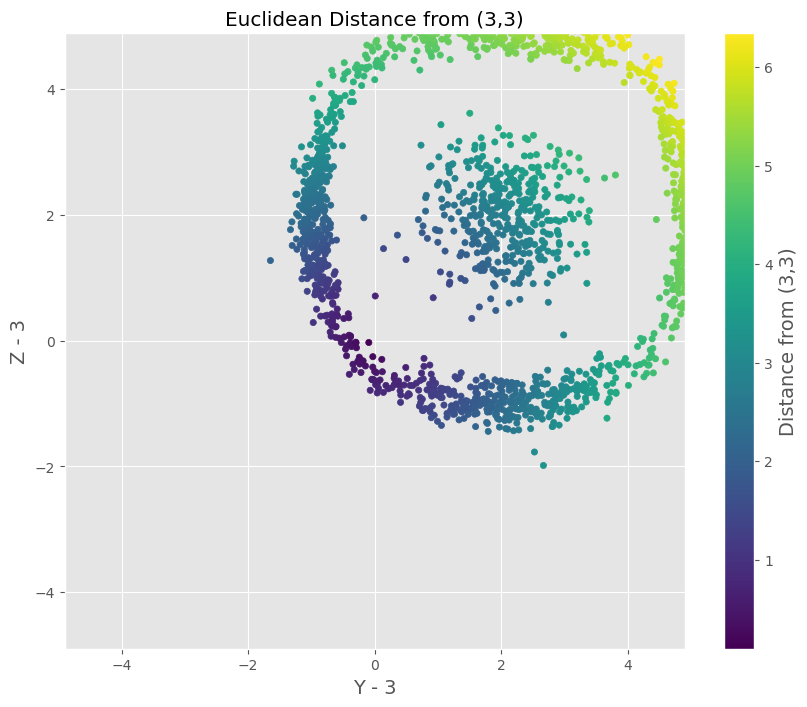

In [27]:
#distance matrix with ref point(3,3) distEuclid_3
# Replace the value set to 'c' with distEuclid_3

# Create a distance to reference point (3,3)
distEuclid_3 = np.sqrt((df.Z - 3)**2 + (df.Y - 3)**2)

# Plotting the distances using the new reference point (3,3)
figEuclid = plt.figure(figsize=[10,8])

plt.scatter(df.Y - 3, df.Z - 3, c=distEuclid_3, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 3', size=14)
plt.ylabel('Z - 3', size=14)
plt.title('Euclidean Distance from (3,3)')
cb = plt.colorbar()
cb.set_label('Distance from (3,3)', size=14)

plt.show()


### Manhattan Distance

Manhattan distance is simply the sum of absolute differences between the points coordinates. This distance is also known as the taxicab or city block distance as it measure distances along the coorinate axis which creates "paths" that look like a cab's route on a grid-style city map.

We display the dataset projected on the XZ plane here color coded per the Manhattan distance to the (X=5, Z=5) reference point. We can see that points laying at the same distance define a circle that looks like a Euclidean square.

In [33]:
# In the Y-Z plane, we compute the distance to ref point (5,5)
distManhattan = np.abs(df.X - 5) + np.abs(df.Z - 5)
distManhattan.head()

0    0.923415
1    1.810324
2    5.081859
3    1.238538
4    3.739102
dtype: float64

**<font color='teal'>Create a Manhattan distance to reference point (4,4) matrix similar to the above example and replace the value for 'c' in the plotting cell to view the result.</font>**

In [35]:
# manhattan distance to reference point(4,4) 
distManhattan_4 = np.abs(df.X - 4) + np.abs(df.Z - 4)
distManhattan_4.head()

0    2.923415
1    2.371765
2    5.081859
3    3.238538
4    1.739102
dtype: float64

Now let's create distributions of these distance metrics and compare them. We leverage the scipy dist function to create these matrices similar to how you manually created them earlier in the exercise.

In [39]:
import scipy.spatial.distance as dist

mat = df[['X','Y','Z']].to_numpy()
DistEuclid = dist.pdist(mat,'euclidean')
DistManhattan = dist.pdist(mat, 'cityblock')
largeMat = np.random.random((10000,100))
DistEuclid

array([1.84227209, 5.29408225, 0.96192617, ..., 4.69183711, 4.2880246 ,
       3.02005239])

**<font color='teal'>Plot histograms of each distance matrix for comparison.</font>**

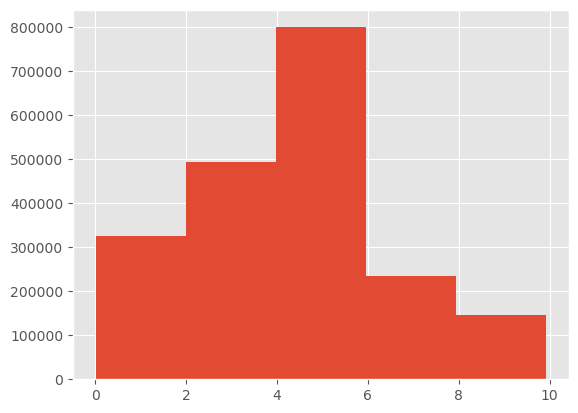

In [71]:
# Euclidean histogram for ref point (5,5)
plt.hist(DistEuclid,bins=5)
plt.show()

The histogram of Euclidean distances from the reference point (5,5) shows a more concentrated distribution, indicating that most points are within a specific range of distances.

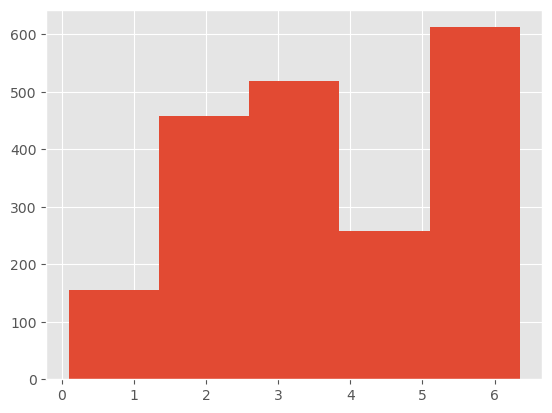

In [73]:
# Euclidean histogram for ref point (3,3)
plt.hist(distEuclid_3,bins=5)
plt.show()

The histogram of Euclidean distances from (3,3) is slightly wider and shows a more varied distribution.

The Euclidean distance is the straight-line distance between two points. 
Points closer to the reference point naturally appear more frequently, leading to a higher peak in the histogram.
The difference between the histograms of (5,5) and (3,3) indicates that the data points are clustered differently around these reference points.

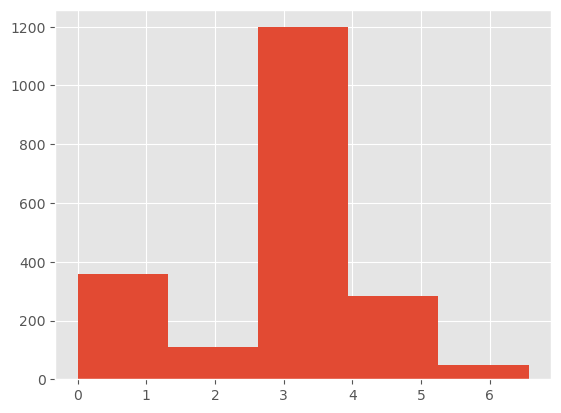

In [75]:
#Manhattan histogram for reference point (5,5)
plt.hist(distManhattan,bins=5)
plt.show()

The histogram of Manhattan distances from (5,5) shows a wider and more varied distribution, indicating that the distances between points vary significantly.

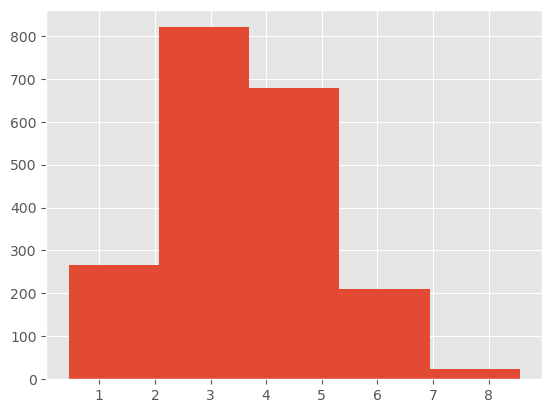

In [77]:
#Manhattan histogram for reference point (4,4)
plt.hist(distManhattan_4,bins=5)
plt.show()

The Manhattan distance from (4,4) has a histogram that also shows significant variation but with a peak at lower distances compared to (5,5).

The Manhattan distance (city block distance) sums the absolute differences along each dimension. 
This metric is typically larger than the Euclidean distance and shows a broader distribution due to its cumulative nature.

The distribution differences between (5,5) and (4,4) reflect that the data points are closer to (4,4) compared to (5,5).


Euclidean vs. Manhattan:

- Euclidean distance histograms tend to be more concentrated since it measures the shortest path (straight line).

- Manhattan distance histograms are typically more spread out since it accumulates distances across each dimension.

Conclusion and Impact of Reference Points:

- Changing the reference point from (5,5) to (3,3) (for Euclidean) or from (5,5) to (4,4) (for Manhattan) changes the histogram distribution.

- This change indicates that the spatial distribution of data points varies significantly depending on the chosen reference point.

When to choose what - 

- Choose Euclidean distance when looking for the shortest path or straight-line proximity.

- Use Manhattan distance when path-following (like navigating a city grid) is more meaningful.